<a href="https://colab.research.google.com/github/rezaldii/InceptionV3-for-Beef-Pork-Image-Classification/blob/main/Skripsi(Model3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

## Pengumpulan Data

In [1]:
# Pertama, install kaggle package
!pip install kaggle

In [2]:
# Buat direktori .kaggle di home directory
!mkdir ~/.kaggle

In [3]:
# Upload file kaggle.json Anda (API key Kaggle)
# Anda perlu menjalankan ini dan mengikuti petunjuk untuk mengupload file kaggle.json
from google.colab import files
files.upload()  # Pilih file kaggle.json Anda


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rezaldi","key":"91a78447712be224c61edf5c930f2eb6"}'}

In [4]:
# Salin file kaggle.json ke direktori yang baru dibuat
!cp kaggle.json ~/.kaggle/

In [5]:
# Ubah izin file agar dapat dibaca
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# Sekarang Anda dapat mengunduh dataset dari Kaggle
!kaggle datasets download -d iqbalagistany/pork-meat-and-horse-meat-dataset

 93% 178M/192M [00:01<00:00, 161MB/s]
100% 192M/192M [00:01<00:00, 140MB/s]


In [7]:
# Ekstrak file zip ke folder 'Dataset'
!unzip pork-meat-and-horse-meat-dataset.zip -d Dataset

Archive:  pork-meat-and-horse-meat-dataset.zip
  inflating: Dataset/Horse Meat/IMG_20220110_105954.jpg  
  inflating: Dataset/Horse Meat/IMG_20220110_105956.jpg  
  inflating: Dataset/Horse Meat/IMG_20220110_105958.jpg  
  inflating: Dataset/Horse Meat/IMG_20220110_110000.jpg  
  inflating: Dataset/Horse Meat/IMG_20220110_110003.jpg  
  inflating: Dataset/Horse Meat/IMG_20220110_110004.jpg  
  inflating: Dataset/Horse Meat/IMG_20220110_110015.jpg  
  inflating: Dataset/Horse Meat/IMG_20220110_110018.jpg  
  inflating: Dataset/Horse Meat/IMG_20220110_110019.jpg  
  inflating: Dataset/Horse Meat/IMG_20220110_110021.jpg  
  inflating: Dataset/Horse Meat/IMG_20220110_110024.jpg  
  inflating: Dataset/Horse Meat/IMG_20220110_110026.jpg  
  inflating: Dataset/Horse Meat/IMG_20220110_110028.jpg  
  inflating: Dataset/Horse Meat/IMG_20220110_110030.jpg  
  inflating: Dataset/Horse Meat/IMG_20220110_110034.jpg  
  inflating: Dataset/Horse Meat/IMG_20220110_110043.jpg  
  inflating: Dataset/Hors

## Pembersihan data

### Menghapus Class Horse Meat

In [8]:
import os
import shutil
import tensorflow as tf

dataset_dir = "/content/Dataset"
horse_meat_dir = os.path.join(dataset_dir, "Horse Meat")

if os.path.exists(horse_meat_dir):
    # Hapus folder Horse Meat beserta isinya
    shutil.rmtree(horse_meat_dir)
    print("Folder Horse Meat telah dihapus.")

else:
    print("Folder Horse Meat tidak ditemukan.")

# Verifikasi folder Horse Meat sudah terhapus
print(f"Folders di {dataset_dir}: {os.listdir(dataset_dir)}")

Folder Horse Meat telah dihapus.
Folders di /content/Dataset: ['Meat', 'Pork']


### Mengubah nama label

In [9]:
import os
import tensorflow as tf

dataset_dir = "/content/Dataset"
pork_dir = os.path.join(dataset_dir, "Pork")
meat_dir = os.path.join(dataset_dir, "Meat")

# Ubah nama folder Pork menjadi Babi
new_pork_dir = os.path.join(dataset_dir, "Babi")
os.rename(pork_dir, new_pork_dir)

# Ubah nama folder Meat menjadi Sapi
new_meat_dir = os.path.join(dataset_dir, "Sapi")
os.rename(meat_dir, new_meat_dir)

# Verifikasi perubahan nama folder
print(f"Folders di {dataset_dir}: {os.listdir(dataset_dir)}")

Folders di /content/Dataset: ['Sapi', 'Babi']


## membaca dan memproses gamabr

In [10]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

dataset_dir = "/content/Dataset"
data = []
labels = ['Babi', 'Sapi']

# Membuat fungsi untuk membaca dan memproses gambar
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = load_img(os.path.join(folder, filename), target_size=(299, 299))
        img_array = img_to_array(img)
        # Normalisasi
        img_array /= 255.0
        images.append(img_array)
    return images

# Memuat gambar untuk setiap kelas dan menambahkannya ke list Data
for label in labels:
    folder = os.path.join(dataset_dir, label)
    class_data = load_images_from_folder(folder)
    data.extend(class_data)

# Mengonversi list menjadi array numpy
data = np.array(data)

# Melihat ukuran array data
print("Ukuran data:", data.shape)


Ukuran data: (244, 299, 299, 3)


## Label encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan label encoding pada labels
encoded_labels = label_encoder.fit_transform(labels)

# Menampilkan hasil label encoding beserta labelnya
for label, encoded_label in zip(labels, encoded_labels):
    print(f"{label}: {encoded_label}")

Babi: 0
Sapi: 1


## pembagian data 70-15-15

In [12]:
import os
import numpy as np
import shutil

# Definisikan rasio split
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Path untuk direktori train, validation, dan test
train_dir = "/content/Dataset/train"
val_dir = "/content/Dataset/validation"
test_dir = "/content/Dataset/test"

# Membuat direktori jika belum ada
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Membagi data untuk setiap kelas
for label in labels:
    label_dir = os.path.join(dataset_dir, label)
    images = os.listdir(label_dir)
    num_images = len(images)

    # Acak urutan gambar
    np.random.shuffle(images)

    # Hitung jumlah data untuk masing-masing set
    num_train = int(train_ratio * num_images)
    num_val = int(val_ratio * num_images)
    num_test = int(test_ratio * num_images)

    # Bagi data menjadi train, validation, dan test sets
    train_images = images[:num_train]
    val_images = images[num_train:num_train + num_val]
    test_images = images[num_train + num_val:]

    # Pindahkan gambar ke masing-masing direktori
    for img in train_images:
        src = os.path.join(label_dir, img)
        dst = os.path.join(train_dir, label)
        os.makedirs(dst, exist_ok=True)
        shutil.copy(src, dst)

    for img in val_images:
        src = os.path.join(label_dir, img)
        dst = os.path.join(val_dir, label)
        os.makedirs(dst, exist_ok=True)
        shutil.copy(src, dst)

    for img in test_images:
        src = os.path.join(label_dir, img)
        dst = os.path.join(test_dir, label)
        os.makedirs(dst, exist_ok=True)
        shutil.copy(src, dst)

# Verifikasi jumlah data dalam setiap set
print("Jumlah data train (Sapi):", len(os.listdir(os.path.join(train_dir, 'Sapi'))))
print("Jumlah data train (Babi):", len(os.listdir(os.path.join(train_dir, 'Babi'))))
print("Jumlah data validation (Sapi):", len(os.listdir(os.path.join(val_dir, 'Sapi'))))
print("Jumlah data validation (Babi):", len(os.listdir(os.path.join(val_dir, 'Babi'))))
print("Jumlah data test (Sapi):", len(os.listdir(os.path.join(test_dir, 'Sapi'))))
print("Jumlah data test (Babi):", len(os.listdir(os.path.join(test_dir, 'Babi'))))

Jumlah data train (Sapi): 80
Jumlah data train (Babi): 90
Jumlah data validation (Sapi): 17
Jumlah data validation (Babi): 19
Jumlah data test (Sapi): 18
Jumlah data test (Babi): 20


# create model

In [15]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Concatenate
from tensorflow.keras.optimizers import Adam

# Load pre-trained InceptionV3 model without the top (fully connected) layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x) # Increase dense layer size
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Add additional convolutional block from base model
conv_layer = base_model.get_layer('mixed7')
x = conv_layer.output

x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

predictions = Dense(2, activation='softmax')(x)

# Combine the base model and custom layers into a new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
optimizer = Adam(lr=0.00001) # Lower learning rate
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_188 (Conv2D)         (None, 149, 149, 32)         864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_190 (B  (None, 149, 149, 32)         96        ['conv2d_188[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_188 (Activation  (None, 149, 149, 32)         0         ['batch_normalization_190[

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data generators for train, validation, and test sets
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define batch size
batch_size = 32

# Define train, validation, and test generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

# Define number of training steps and validation steps
train_steps_per_epoch = train_generator.samples // batch_size
val_steps_per_epoch = val_generator.samples // batch_size

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps_per_epoch,
    epochs=15,  # You can adjust the number of epochs as needed
    validation_data=val_generator,
    validation_steps=val_steps_per_epoch
)

Found 170 images belonging to 2 classes.
Found 36 images belonging to 2 classes.
Found 38 images belonging to 2 classes.
Epoch 1/15
5/5 [==============================] - 18s 2s/step - loss: 0.3247 - accuracy: 0.8333 - val_loss: 0.5333 - val_accuracy: 0.9375
Epoch 2/15
5/5 [==============================] - 4s 863ms/step - loss: 0.0137 - accuracy: 0.9928 - val_loss: 0.4845 - val_accuracy: 0.9062
Epoch 3/15
5/5 [==============================] - 3s 699ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.4607 - val_accuracy: 0.9062
Epoch 4/15
5/5 [==============================] - 4s 890ms/step - loss: 0.0072 - accuracy: 0.9928 - val_loss: 0.4371 - val_accuracy: 0.9062
Epoch 5/15
5/5 [==============================] - 4s 791ms/step - loss: 0.0137 - accuracy: 0.9928 - val_loss: 0.3992 - val_accuracy: 0.9688
Epoch 6/15
5/5 [==============================] - 4s 770ms/step - loss: 4.2529e-04 - accuracy: 1.0000 - val_loss: 0.3747 - val_accuracy: 1.0000
Epoch 7/15
5/5 [=====================

# Evaluasi model

2/2 [==============================] - 3s 2s/step


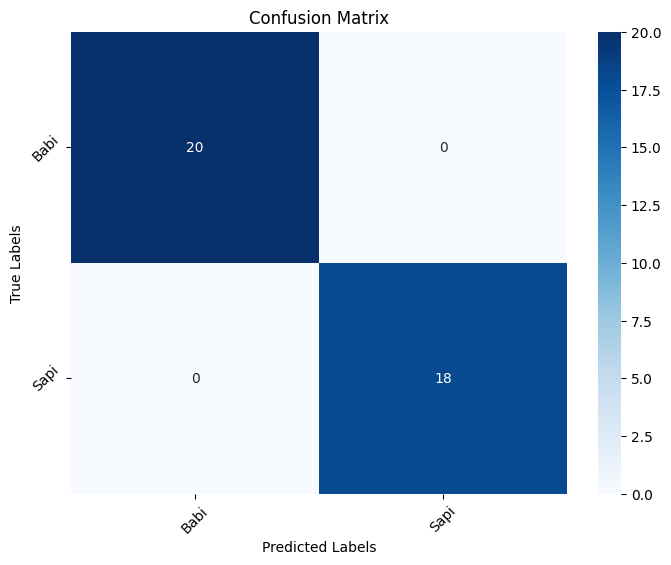

Classification Report:
              precision    recall  f1-score   support

        Babi       1.00      1.00      1.00        20
        Sapi       1.00      1.00      1.00        18

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict probabilities for test set
y_pred_prob = model.predict(test_generator)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Get true labels
y_true = test_generator.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Define class labels
class_labels = test_generator.class_indices.keys()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))